In [0]:
import pandas as pd

In [0]:
df_train = pd.read_csv("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/train_Wc8LBpr.csv")

In [0]:
df_test = pd.read_csv("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/test_VsU9xXK.csv")

In [0]:
df_submission= pd.read_csv("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/sample_submission_NoPBkjr.csv")

In [0]:
df_train.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,60632.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,64.202698,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,21.820447,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,30.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,46.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,61.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,80.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,210.000000,124.000000,206.000000,3.000000


In [0]:
df_test.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3
count,87395.000000,83429.000000,74068.000000,87395.000000,87395.000000,40606.000000,87395.000000,87395.000000
mean,44.095174,5.990051,2.803392,2.847389,0.783031,63.936610,51.162160,75.015699
std,25.483993,3.626861,0.227113,0.981744,1.034266,21.636247,4.956831,11.582761
min,1.550000,0.000000,1.317850,0.001250,0.000000,30.000000,41.000000,52.000000
25%,24.540000,3.000000,2.654518,2.152500,0.000000,45.000000,48.000000,67.000000
50%,38.060000,6.000000,2.798630,2.895000,0.000000,61.000000,50.000000,73.000000
75%,60.690000,10.000000,2.949053,3.580000,1.000000,79.000000,54.000000,82.000000
max,109.230000,10.000000,4.871920,5.000000,8.000000,178.000000,116.000000,169.000000


Preliminary check on the train and test data shows similar pattern in their mean and quartile distribution. This is great. We can assume that the test data is similar to that of train and predictions can work. 


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  131662 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  74237 non-null  object 
 3   Customer_Since_Months        83429 non-null  float64
 4   Life_Style_Index             74068 non-null  float64
 5   Confidence_Life_Style_Index  87395 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var1                         40606 non-null  float64
 10  Var2                         87395 non-null  int64  
 11  Var3                         87395 non-null  int64  
 12  Gender                       87395 non-null  object 
dtypes: float64(5), i

## Quick comments on data in train and test:

1. Train and Test have no empty Train_ID, Train_Distance. 
2. We have few NaN in Type_of_Cab for both Train and Test. Lets create a new category with all the NaN values
3. Customer_Since_Months has few NaN values and replace them with 0. They are the newbies to this cab services. 
4. Life_Style_Index, Confidence_Life_Style_Index. This is a propritery value by the cab company and we have no idea how it is derived. Can think of omitting the NaN rows. Since, replacing them with 0 might mean something different. Or, can perform EDA and decide later.  
5. Destination_Type, Customer_Rating, Cancellation_Last_1Month have no missing values. 
6. Var1 is masked by the company and is very sparse. We definitely cant remove all records with NaN values and neither assume them to be 0. we could take a call on this after EDA. 

In [0]:
set(df_train['Type_of_Cab']) # let nan be a new category. 

{'A', 'B', 'C', 'D', 'E', nan}

In [0]:
df_train['Type_of_Cab'].fillna('F', inplace=True)

In [0]:
set(df_train['Type_of_Cab']) 

{'A', 'B', 'C', 'D', 'E', 'F'}

In [0]:
df_test['Type_of_Cab'].fillna('F', inplace=True) #Replicating the same on Test Data. 

In [0]:
#Replacing the NaN values with 0 for Customer_Since_Months for train and test.        
df_train['Customer_Since_Months'].fillna(0, inplace=True)
df_test['Customer_Since_Months'].fillna(0, inplace=True)

In [0]:
# Dropping Var1 from Test and Train

df_train.drop(columns='Var1', inplace=True)
df_test.drop(columns='Var1', inplace=True)

## Basic EDA 

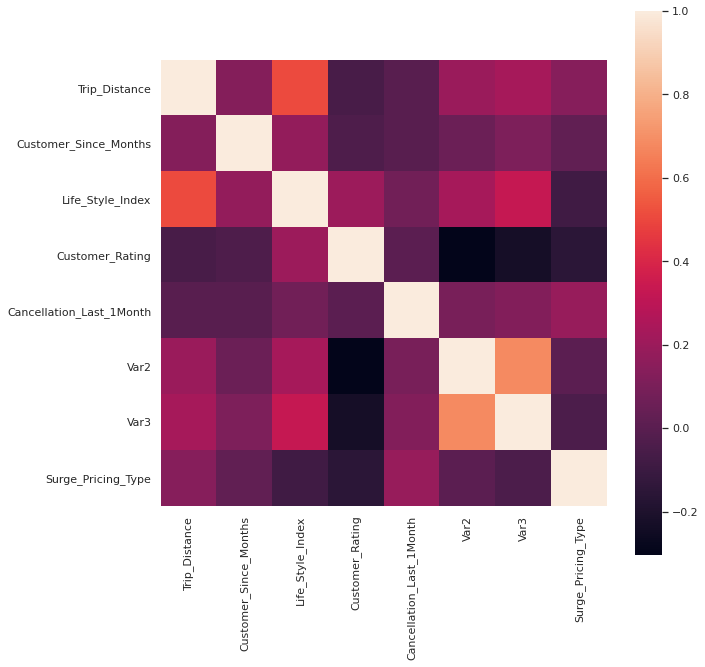

In [0]:
#Correlation Heat Map
import seaborn as sns
from matplotlib import pyplot as plt

cor = df_train.corr() 
plt.subplots(figsize=(10,10))
sns.heatmap(cor, square = True)

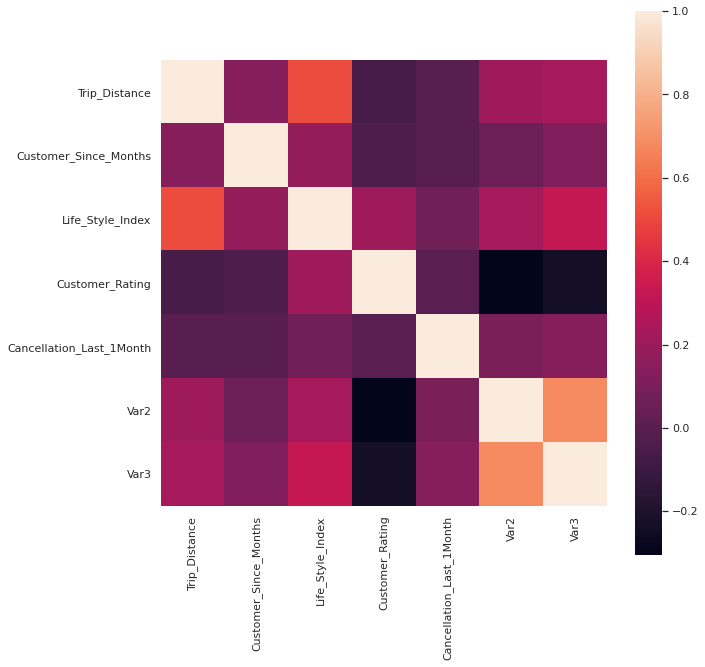

In [0]:
cor = df_test.corr() 
plt.subplots(figsize=(10,10))
sns.heatmap(cor, square = True)

In [0]:
# Var 2 and Var 3 are correlated and can remove Var2

df_train.drop(columns='Var2', inplace=True)
df_test.drop(columns='Var2', inplace=True)

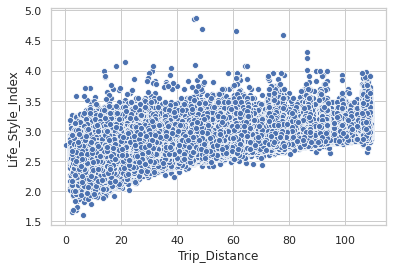

In [0]:
ax = sns.scatterplot(x="Trip_Distance", y="Life_Style_Index", data=df_train)

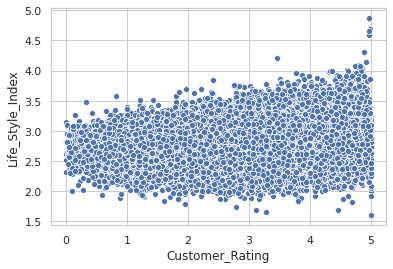

In [0]:
ax = sns.scatterplot(x="Customer_Rating", y="Life_Style_Index", data=df_train)

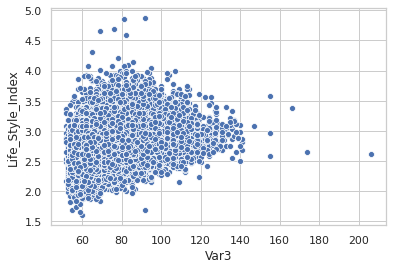

In [0]:
ax = sns.scatterplot(x="Var3", y="Life_Style_Index", data=df_train)


In [0]:
print(df_train['Life_Style_Index'].mode())
print(df_test['Life_Style_Index'].mode())

0    2.70697
1    2.77608
dtype: float64
0    2.77137
1    2.77514
2    2.77677
dtype: float64


From the above 3 scatter plots, we can notice that most of the values of Life_style_index is distributed between 2 to 3.5 

For simplicity, we fill assume NaN values with mode (2.7)

In [0]:
df_train['Life_Style_Index'].fillna(2.7, inplace=True)


In [0]:
df_test['Life_Style_Index'].fillna(2.7, inplace=True)

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  131662 non-null  object 
 3   Customer_Since_Months        131662 non-null  float64
 4   Life_Style_Index             131662 non-null  float64
 5   Confidence_Life_Style_Index  131662 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var3                         131662 non-null  int64  
 10  Gender                       131662 non-null  object 
 11  Surge_Pricing_Type           131662 non-null  int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 12.1+ MB


In [0]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87395 entries, 0 to 87394
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_ID                      87395 non-null  object 
 1   Trip_Distance                87395 non-null  float64
 2   Type_of_Cab                  87395 non-null  object 
 3   Customer_Since_Months        87395 non-null  float64
 4   Life_Style_Index             87395 non-null  float64
 5   Confidence_Life_Style_Index  87395 non-null  object 
 6   Destination_Type             87395 non-null  object 
 7   Customer_Rating              87395 non-null  float64
 8   Cancellation_Last_1Month     87395 non-null  int64  
 9   Var3                         87395 non-null  int64  
 10  Gender                       87395 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 7.3+ MB


[Text(0, 0, 'A'), Text(0, 0, 'B'), Text(0, 0, 'C')]

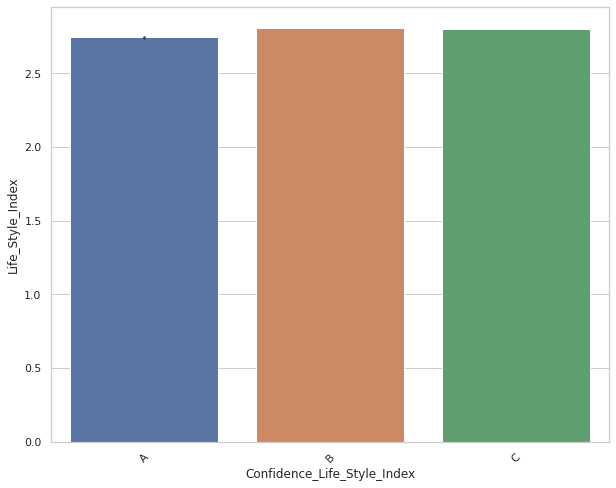

In [0]:
#Plot between Confidence_Life_Style_Index  and Life_Style_Index   
plt.subplots(figsize=(10,8))
sns.set(style="whitegrid")
#x=df_train.groupby(['Confidence_Life_Style_Index'], axis=0).size().index
x=df_train.Confidence_Life_Style_Index
y1=df_train.Life_Style_Index
ax = sns.barplot(x=x, y=y1, data=df_train)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Look like the Confidence_Life_Style_Index is randomly assigned with equal distribution. For simplicity, lets equally assign A,B,C to the NaNs in the field. 

In [0]:
## Just removing rows with NaN values in Confidence_Life_Style_Index

#df_train.dropna(subset=['Confidence_Life_Style_Index'], inplace=True)

In [0]:
#df_test.dropna(subset=['Confidence_Life_Style_Index'], inplace=True)

In [0]:
#random_value= np.random.choice(['A', 'B', 'C'], size=20193)

#random_series = pd.Series(random_value)

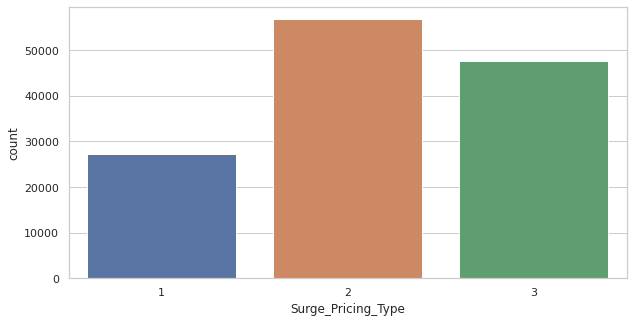

In [0]:
plt.figure(figsize=(10,5))
sns.countplot(df_train['Surge_Pricing_Type'])
plt.show()

#Sampling isn't required. 

In [0]:
  DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)

One-Hot Coding and Modeling

In [0]:
df_train.drop(columns='Trip_ID', inplace=True)

In [0]:
df_test.drop(columns='Trip_ID', inplace=True)

In [0]:
df_train = pd.get_dummies(df_train, columns=['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender'])

In [0]:
df_test = pd.get_dummies(df_test, columns=['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender'])

In [0]:
df_train.drop(columns=['Type_of_Cab_A', 'Confidence_Life_Style_Index_A', 'Destination_Type_A', 'Gender_Female'], inplace=True)

In [0]:
df_test.drop(columns=['Type_of_Cab_A', 'Confidence_Life_Style_Index_A', 'Destination_Type_A', 'Gender_Female'], inplace=True)

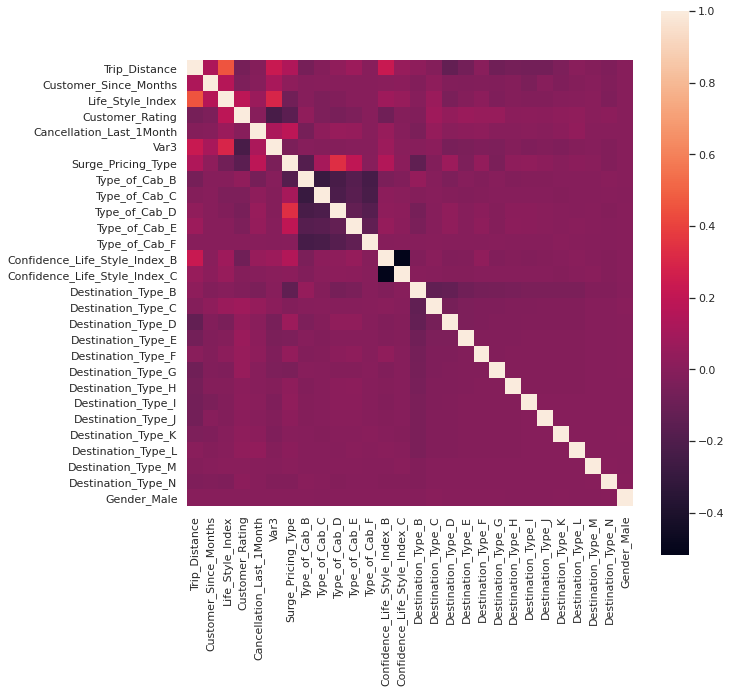

In [0]:
cor = df_train.corr() 
plt.subplots(figsize=(10,10))
sns.heatmap(cor, square = True)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns='Surge_Pricing_Type'), df_train['Surge_Pricing_Type'], test_size=0.2)

In [0]:
import pickle
X_train.to_pickle("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/X_train.pkl")
X_test.to_pickle("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/X_test.pkl")
y_train.to_pickle("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/y_train.pkl")
y_test.to_pickle("/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/y_test.pkl")


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf_model = RandomForestClassifier()

In [0]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions_rf = rf_model.predict(X_test)

In [0]:
accuracy_score=metrics.accuracy_score(y_test, predictions_rf)
accuracy_score

0.6857175407283637

In [0]:
predictions = rf_model.predict(df_test)

In [0]:
len(predictions)

87395

In [0]:
predictions

array([1, 2, 2, ..., 1, 2, 2])

In [0]:
df_submission.drop(columns='Surge_Pricing_Type', inplace=True)

In [0]:
df_submission['Surge_Pricing_Type']=predictions

In [0]:
df_submission.to_csv('/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/Prediction_rf.csv')

Decison Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

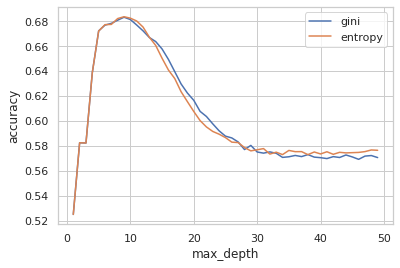

In [0]:
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,50):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(X_train, y_train)
 pred = dtree.predict(X_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

XGBoost

In [0]:
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.model_selection import GridSearchCV


In [0]:
clf = xgb.XGBClassifier(objective='multi:softmax', n_estimators=27, 
                        num_classes=3)


In [0]:
clf.fit(X_train, y_train)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=27, n_jobs=1,
              nthread=None, num_classes=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
pred=clf.predict(X_test)

In [0]:
pred

array([2, 1, 2, ..., 2, 2, 3])

In [0]:
accuracy_score=metrics.accuracy_score(y_test, pred)
accuracy_score

0.6835149812022937

In [0]:
xgb_model = xgb.XGBClassifier()
optimization_dict = {'max_depth': [2,4,6,None],
                     'n_estimators': [50,100,200,None]}

In [0]:
model = GridSearchCV(xgb_model, optimization_dict, 
                     scoring='accuracy', verbose=1)

In [0]:
model.fit(X_train, y_train)

In [0]:
print(model.best_score_)
print(model.best_params_)

0.6996933449514483
{'max_depth': 6, 'n_estimators': 200}


In [0]:
pred=model.predict(X_test)
accuracy_score=metrics.accuracy_score(y_test, pred)
accuracy_score

0.6966164128659856

In [0]:
predictions_xgb = model.predict(df_test)

In [0]:
predictions_xgb

array([1, 2, 2, ..., 1, 2, 2])

In [0]:
df_submission['Surge_Pricing_Type']=predictions_xgb

In [0]:
df_submission.to_csv('/content/drive/My Drive/Projects/Hackathons/Analytics Vidya/Mobility/Data/Prediction_xgb.csv')